In [143]:
import matplotlib.pyplot as plt
import mediapipe as mp
import numpy as np
import cv2

### Load images

In [144]:
person_img_path  = "./1.png"
sweater_img_path = "./test.png"
person_img       = cv2.imread(person_img_path)
sweater_img      = cv2.imread(sweater_img_path)

person_img = cv2.cvtColor(person_img,cv2.COLOR_BGR2RGB)
sweater_img= cv2.cvtColor(sweater_img,cv2.COLOR_BGR2RGB)

### Visualization images

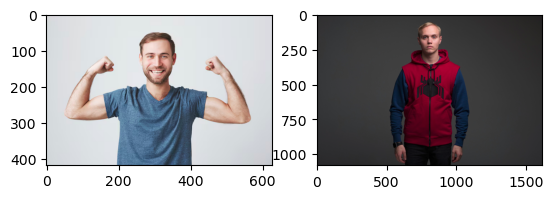

In [145]:
f, axs = plt.subplots(1,2)

axs[0].imshow(person_img)
axs[1].imshow(sweater_img)

### find pts on person image

I0000 00:00:1718667135.046486   22657 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1718667135.047532   27974 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1718667135.178179   27968 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1718667135.210924   27966 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/home/bob/.local/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


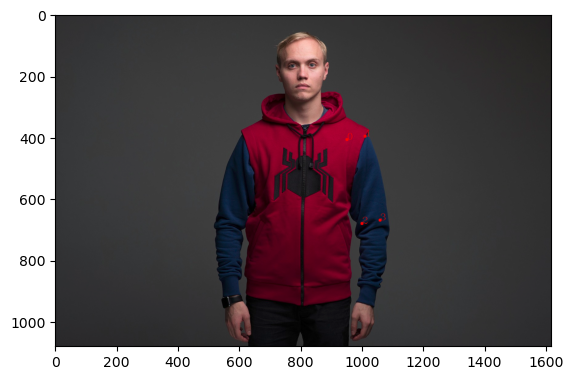

In [146]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False  # Image is no longer writeable
    results = model.process(image)  # Make prediction
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results


def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)


def find_4_points(image, x1, y1, x2, y2, length):
    angle = np.arctan2(y2 - y1, x2 - x1)

    x_1 = int(x1 + length * np.cos(angle + np.pi/2))
    y_1 = int(y1 + length * np.sin(angle + np.pi/2))

    x_2 = int(x1 - length * np.cos(angle + np.pi/2))
    y_2 = int(y1 - length * np.sin(angle + np.pi/2))
    
    x_3 = int(x2 + length * np.cos(angle + np.pi/2))
    y_3 = int(y2 + length * np.sin(angle + np.pi/2))
    
    x_4 = int(x2 - length * np.cos(angle + np.pi/2))
    y_4 = int(y2 - length * np.sin(angle + np.pi/2))

    return [[x_1,y_1],[x_2,y_2],[x_3,y_3],[x_4,y_4]]

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    image, results = mediapipe_detection(sweater_img, pose)
    left_shoulder = [
        int(
            results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x
            * image.shape[1]
        ),
        int(
            results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y
            * image.shape[0]
        ),
    ]
    left_elbow = [
        int(
            results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW.value].x
            * image.shape[1]
        ),
        int(
            results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW.value].y
            * image.shape[0]
        ),
    ]

    points_sweater = find_4_points(image, *left_shoulder, *left_elbow, 30)

    # draw_landmarks(image, results)
    for i,point in enumerate(points_sweater):
        image = cv2.putText(image,f"{i}",point,3,1,(255,0,0))
        image = cv2.circle(image,point,5,(255,0,0),-1) 

plt.imshow(image)

### extract object

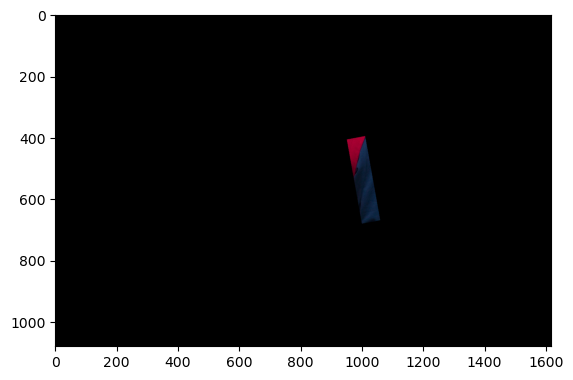

In [147]:
pts_for_poly = np.array([points_sweater[0],points_sweater[2],points_sweater[3],points_sweater[1]])
mask = np.zeros(sweater_img.shape[:-1],dtype=np.uint8)
mask = cv2.fillPoly(mask,[pts_for_poly],255)
_sweater_img = cv2.bitwise_and(sweater_img,sweater_img,mask=mask)
plt.imshow(_sweater_img)

I0000 00:00:1718667136.813101   22657 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1718667136.842646   27986 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1), renderer: Mesa Intel(R) UHD Graphics (ICL GT1)
W0000 00:00:1718667137.003247   27976 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1718667137.033524   27979 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


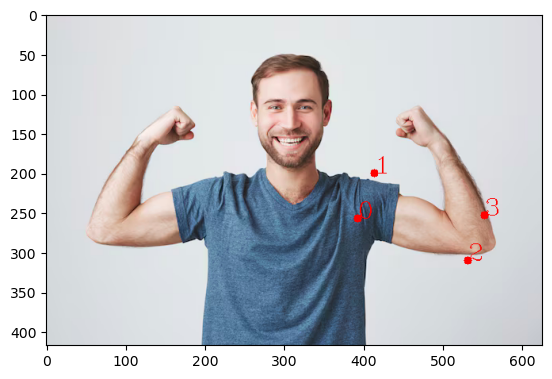

In [148]:
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    image, results = mediapipe_detection(person_img, pose)
    left_shoulder = [
        int(
            results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x
            * image.shape[1]
        ),
        int(
            results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y
            * image.shape[0]
        ),
    ]
    left_elbow = [
        int(
            results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW.value].x
            * image.shape[1]
        ),
        int(
            results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW.value].y
            * image.shape[0]
        ),
    ]

    points_person = find_4_points(image, *left_shoulder, *left_elbow, 30)

    # draw_landmarks(image, results)
    for i,point in enumerate(points_person):
        image = cv2.putText(image,f"{i}",point,3,1,(255,0,0))
        image = cv2.circle(image,point,5,(255,0,0),-1) 

plt.imshow(image)

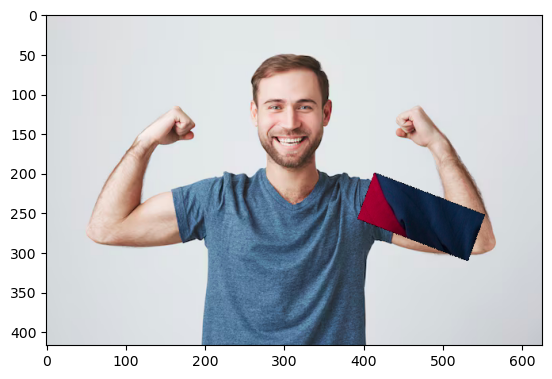

In [149]:
pts1 = np.array(points_person)
pts2 = np.array(points_sweater)
h, _ = cv2.findHomography(pts2, pts1)
r = cv2.warpPerspective(_sweater_img, h, (image.shape[1], image.shape[0]))
r_gray = cv2.cvtColor(r,cv2.COLOR_BGR2GRAY)
_,mask = cv2.threshold(r_gray,1,255,cv2.THRESH_BINARY)

_person_img = cv2.bitwise_and(person_img,person_img,mask=cv2.bitwise_not(mask))
_person_img = cv2.add(_person_img,r)
plt.imshow(_person_img)